<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
 - Luis Felipe Gómez Estrada   
 - Eduardo Loza de la Torre  
**Fecha:** 22 de febrero del 2021.

**Expediente** : IF722749. 
**Expediente** :   
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 11: Clase 24


# Tarea
Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

## Luis Felipe Gómez Estrada

In [136]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from datetime import date
from pandas_datareader import data as web

In [137]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [138]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_msft = closes.loc[:,'MSFT']
closes_msft

Date
2017-01-03     58.538418
2017-01-04     58.276497
2017-01-05     58.276497
2017-01-06     58.781628
2017-01-09     58.594547
                 ...    
2021-05-03    251.860001
2021-05-04    247.789993
2021-05-05    246.470001
2021-05-06    249.729996
2021-05-07    253.225006
Name: MSFT, Length: 1094, dtype: float64

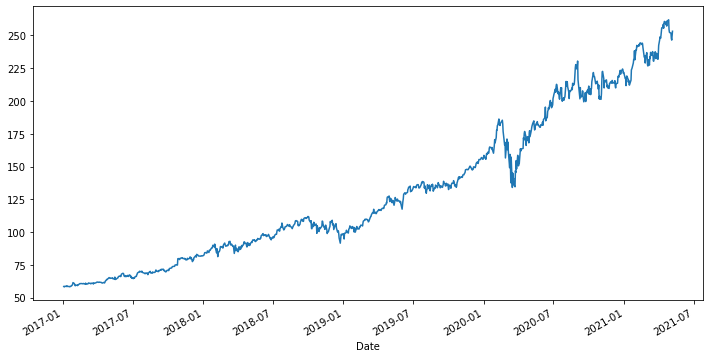

In [139]:
closes_msft.plot(figsize=(12,6));

In [140]:
closes_msft[-1]

253.22500610351562

In [141]:
ret_msft = calc_daily_ret(closes_msft)

In [142]:
pd.set_option('display.max_rows', 10)

msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry').sort_index()#.head(1000)

,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,,,,
2021-05-07,200.0,call,MSFT210507C00200000,46.42,52.80,53.20,0.00,0.000000,1.0,54.0,0.000010,MSFT,False,MSFT,253.2300,2021-05-07 14:50:09,2021-05-05 19:00:24,"{'contractSymbol': 'MSFT210507C00200000', 'str..."
2021-05-07,155.0,put,MSFT210507P00155000,0.02,0.00,0.02,0.00,0.000000,1.0,7.0,3.062502,MSFT,False,MSFT,253.2300,2021-05-07 14:50:09,2021-04-23 17:46:50,"{'contractSymbol': 'MSFT210507P00155000', 'str..."
2021-05-07,120.0,put,MSFT210507P00120000,0.01,0.00,0.01,0.00,0.000000,1.0,30.0,4.375005,MSFT,False,MSFT,253.2300,2021-05-07 14:50:09,2021-05-03 13:30:01,"{'contractSymbol': 'MSFT210507P00120000', 'str..."
2021-05-07,120.0,call,MSFT210507C00120000,129.65,133.10,133.30,0.00,0.000000,2.0,86.0,5.468753,MSFT,False,MSFT,253.2300,2021-05-07 14:50:09,2021-05-06 19:59:12,"{'contractSymbol': 'MSFT210507C00120000', 'str..."
2021-05-07,252.5,put,MSFT210507P00252500,0.34,0.36,0.39,-2.91,-89.538470,1573.0,0.0,0.131600,MSFT,False,MSFT,253.2300,2021-05-07 14:50:09,2021-05-07 14:34:29,"{'contractSymbol': 'MSFT210507P00252500', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16,285.0,call,MSFT230616C00285000,23.23,23.25,25.50,0.23,0.999998,1.0,112.0,0.253746,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-05-07 13:40:37,"{'contractSymbol': 'MSFT230616C00285000', 'str..."
2023-06-16,285.0,put,MSFT230616P00285000,59.30,55.05,58.10,0.00,0.000000,NaN,18.0,0.260124,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-29 19:07:08,"{'contractSymbol': 'MSFT230616P00285000', 'str..."
2023-06-16,290.0,call,MSFT230616C00290000,21.55,22.00,24.15,0.48,2.278118,15.0,165.0,0.254738,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-05-07 13:40:37,"{'contractSymbol': 'MSFT230616C00290000', 'str..."


## OPCIÓN CALL

In [143]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Expiry=='2022-06-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
16,80.0,2022-06-17,call,MSFT220617C00080000,178.22,172.85,173.75,0.0,0.0,3.0,85.0,0.516851,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-13 17:46:55,"{'contractSymbol': 'MSFT220617C00080000', 'str..."
26,85.0,2022-06-17,call,MSFT220617C00085000,104.29,0.00,0.00,0.0,0.0,3.0,3.0,0.000010,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2020-07-09 20:58:18,"{'contractSymbol': 'MSFT220617C00085000', 'str..."
36,90.0,2022-06-17,call,MSFT220617C00090000,162.80,162.90,163.65,0.0,0.0,1.0,4.0,0.451177,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-05-03 15:11:00,"{'contractSymbol': 'MSFT220617C00090000', 'str..."
46,95.0,2022-06-17,call,MSFT220617C00095000,113.35,106.00,111.00,0.0,0.0,5.0,19.0,0.000010,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2020-10-02 15:54:24,"{'contractSymbol': 'MSFT220617C00095000', 'str..."
58,100.0,2022-06-17,call,MSFT220617C00100000,160.50,152.90,153.80,0.0,0.0,1.0,128.0,0.428717,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-22 15:24:35,"{'contractSymbol': 'MSFT220617C00100000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,365.0,2022-06-17,call,MSFT220617C00365000,2.92,2.69,2.99,0.0,0.0,2.0,327.0,0.249153,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-30 13:43:57,"{'contractSymbol': 'MSFT220617C00365000', 'str..."
1818,370.0,2022-06-17,call,MSFT220617C00370000,2.41,2.46,2.71,0.0,0.0,1.0,169.0,0.249733,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-05-05 17:59:45,"{'contractSymbol': 'MSFT220617C00370000', 'str..."
1832,375.0,2022-06-17,call,MSFT220617C00375000,3.45,2.25,2.49,0.0,0.0,2.0,101.0,0.251045,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-21 19:54:53,"{'contractSymbol': 'MSFT220617C00375000', 'str..."
1851,380.0,2022-06-17,call,MSFT220617C00380000,2.50,2.06,2.31,0.0,0.0,3.0,225.0,0.252876,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-28 15:42:01,"{'contractSymbol': 'MSFT220617C00380000', 'str..."


#### Sonrisa de Volatilidad

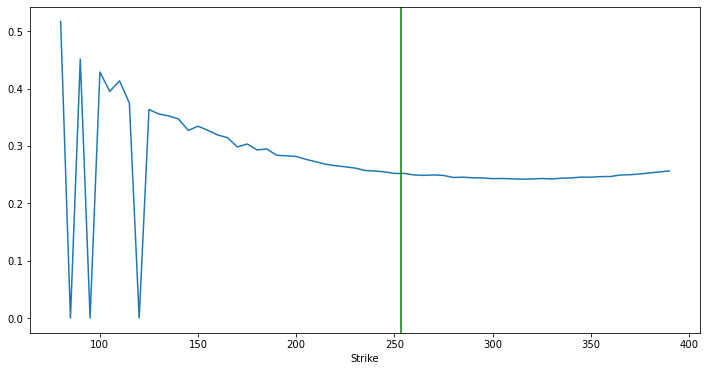

In [144]:
ax = opt_deseada.set_index('Strike').loc[:, 'IV'].plot(figsize=(12,6))
ax.axvline(opt_deseada.Underlying_Price.iloc[0], color='g');

Buscaremos un call out of the money (con strike mayor a 250) para junio del siguiente año, porque el activo parece tener una buena tendencia alcista por lo que me hacen pensar que si llegará a romper esa barrera para las opciones down and out, además que la prima estaría relativamente barata. Tomaremos la opción con un strike de \$260.

In [145]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Expiry=='2022-06-17') & (msft_opt.Strike==260)]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1144,260.0,2022-06-17,call,MSFT220617C00260000,23.29,23.1,23.65,2.530001,12.186901,10.0,0.0,0.249275,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-05-07 13:31:06,"{'contractSymbol': 'MSFT220617C00260000', 'str..."


In [146]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            260
Expiry                                            2022-06-17 00:00:00
Type                                                             call
Symbol                                            MSFT220617C00260000
Last                                                            23.29
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                              253.268
Quote_Time                                        2021-05-07 14:50:10
Last_Trade_Date                                   2021-05-07 13:31:06
JSON                {'contractSymbol': 'MSFT220617C00260000', 'str...
Name: 1144, Length: 19, dtype: object

In [147]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT220617C00260000',
 'strike': 260.0,
 'currency': 'USD',
 'lastPrice': 23.29,
 'change': 2.5300007,
 'percentChange': 12.186901,
 'volume': 10,
 'openInterest': 0,
 'bid': 23.1,
 'ask': 23.65,
 'contractSize': 'REGULAR',
 'expiration': 1655424000,
 'lastTradeDate': 1620394266,
 'impliedVolatility': 0.24927508544921873,
 'inTheMoney': False}

### Opción Europea

#### Simulación de precios con modelo normal de rendimientos

In [148]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = (0.05/100)/360
mu, sigma, r

(0.0013399773029961533, 0.017974828814643663, 1.388888888888889e-06)

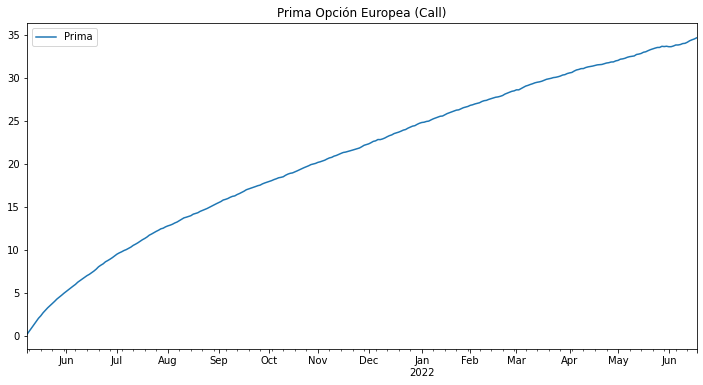

In [149]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

strike = K
call_nr=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0).mean(axis=1)}, index=dates)
call_nr.plot(figsize=(12,6), title='Prima Opción Europea (Call)');

In [150]:
call_nr.iloc[-1]

Prima    34.634282
Name: 2022-06-17 00:00:00, dtype: float64

In [151]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call_nr.iloc[-1].Prima
i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(33.03462421417095, 36.23393887931316)


In [152]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT220617C00260000',
 'strike': 260.0,
 'currency': 'USD',
 'lastPrice': 23.29,
 'change': 2.5300007,
 'percentChange': 12.186901,
 'volume': 10,
 'openInterest': 0,
 'bid': 23.1,
 'ask': 23.65,
 'contractSize': 'REGULAR',
 'expiration': 1655424000,
 'lastTradeDate': 1620394266,
 'impliedVolatility': 0.24927508544921873,
 'inTheMoney': False}

Vemos que la prima de la opción que estamos tomando como referencia tiene una prima más baja que lo que entra en nuestros intervalos de confianza.

#### Simulación de precios mediante el histograma de los rendimientos

In [153]:
freq, values = np.histogram(ret_msft-mu+r, bins=10000)
prob = freq/np.sum(freq)

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)

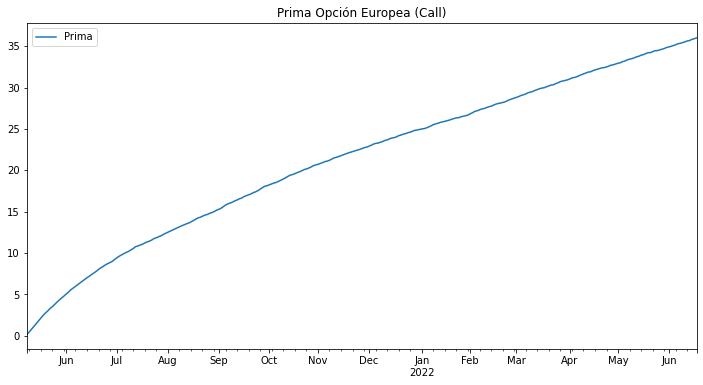

In [154]:
call_hist.plot(figsize=(12,6), title='Prima Opción Europea (Call)');

In [155]:
call_hist.iloc[-1]

Prima    36.002542
Name: 2022-06-17 00:00:00, dtype: float64

In [156]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(34.350274682397654, 37.65480920601951)


In [157]:
opt_valuar['JSON']['lastPrice']

23.29

Regresando al valor real de la opción vemos que en ambas soluciones estamos relativamente cerca del precio de la prima, por lo que consideraremos los resultados como confiables.

#### Comparando las dos simulaciones de la Opción Europea

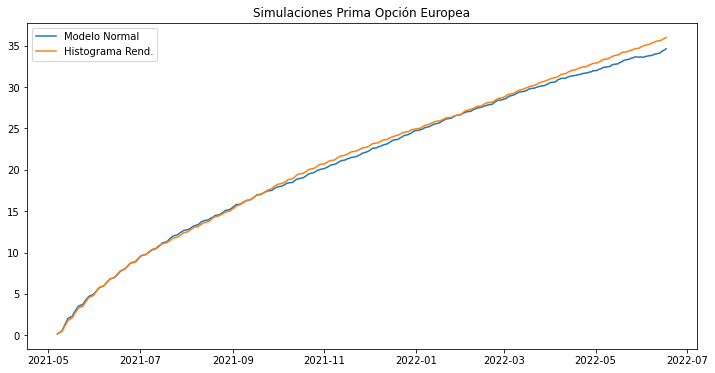

In [158]:
plt.figure(figsize=(12,6))
plt.plot(call_nr.index, call_nr.Prima, label='Modelo Normal')
plt.plot(call_hist.index, call_hist.Prima, label='Histograma Rend.')
plt.title('Simulaciones Prima Opción Europea')
plt.legend()
plt.show()

Podemos ver que ambas simulaciones de la opción europea son bastante similares, con una pequeña diferencia que puede ser despreciable.

### Opción Barrera Down and Out

#### Simulación de precios con modelo normal de rendimientos

En este caso vamos a definir la barrera en \$230 porque parece ser su soporte desde inicios de este año y considero que hay una probabilidad muy baja de que rompa ese soporte.

In [159]:
B = 230
I = (sim_closes > B).cumprod(axis=0) != 0
call_bnr = pd.DataFrame({"Prima": np.exp(-r*ndays)*(I*np.fmax(sim_closes-strike,0)).mean(axis=1)},index=dates) 

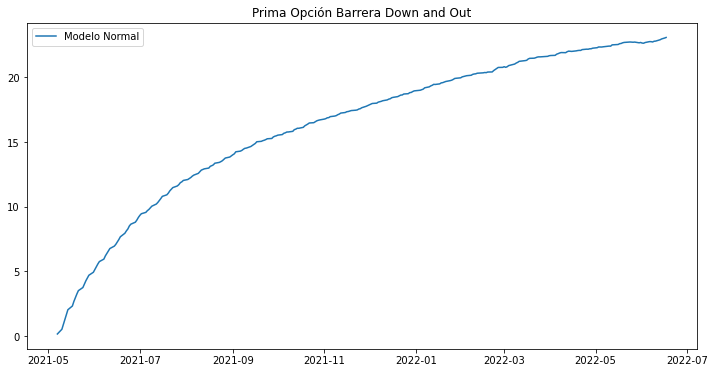

In [160]:
plt.figure(figsize=(12,6))
plt.plot(call_bnr, label='Modelo Normal')
plt.title('Prima Opción Barrera Down and Out')
plt.legend()
plt.show()

In [161]:
call_bnr.iloc[-1]

Prima    23.080862
Name: 2022-06-17 00:00:00, dtype: float64

In [162]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call_bnr.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(21.481204272586634, 24.680518937728845)


#### Comparando con la prima de la opción europea simulada con modelo normal

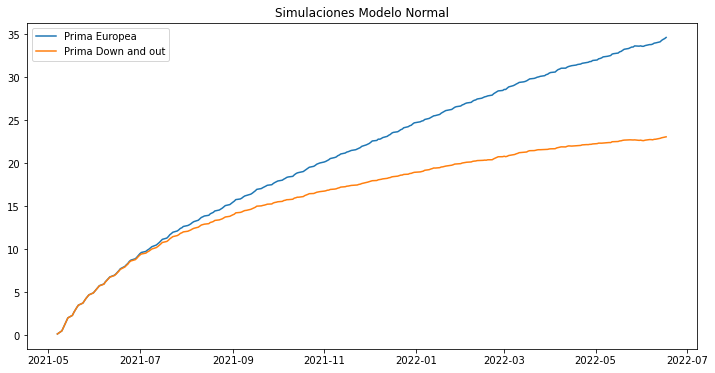

In [163]:
plt.figure(figsize=(12,6))
plt.plot(call_nr.index, call_nr.Prima, label='Prima Europea')
plt.plot(call_bnr, label='Prima Down and out')
plt.title('Simulaciones Modelo Normal')
plt.legend()
plt.show()

#### Simulación de precios mediante histograma

In [164]:
call_bhist = pd.DataFrame({"Prima": np.exp(-r*ndays)*(I*np.fmax(sim_closes_hist-strike,0)).mean(axis=1)},index=dates) 

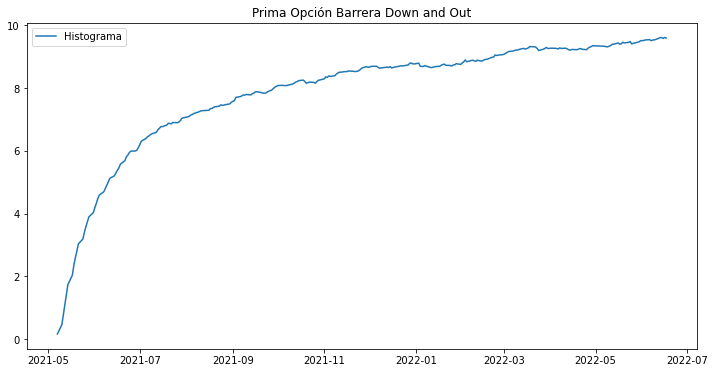

In [165]:
plt.figure(figsize=(12,6))
plt.plot(call_bhist, label='Histograma')
plt.title('Prima Opción Barrera Down and Out')
plt.legend()
plt.show()

In [166]:
call_bhist.iloc[-1]

Prima    9.589504
Name: 2022-06-17 00:00:00, dtype: float64

In [167]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_bhist.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(7.9372364223404785, 11.241770945962335)


#### Comparando con la prima de opción europea simulado mediante histogramas

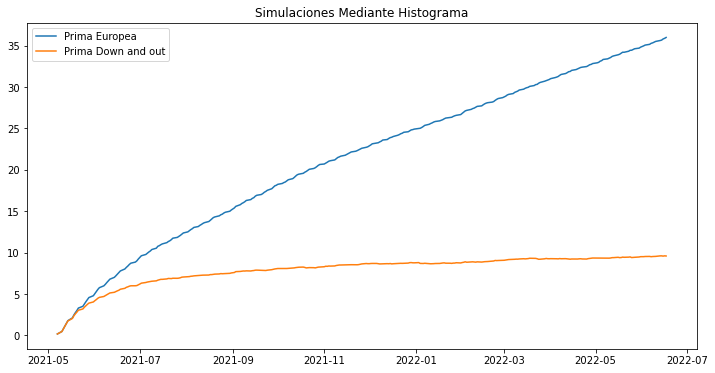

In [168]:
plt.figure(figsize=(12,6))
plt.plot(call_hist.index, call_hist.Prima, label='Prima Europea')
plt.plot(call_bhist, label='Prima Down and out')
plt.title('Simulaciones Mediante Histograma')
plt.legend()
plt.show()

## OPCIÓN PUT

In [169]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Expiry=='2022-06-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
17,80.0,2022-06-17,put,MSFT220617P00080000,0.46,0.41,0.55,-0.03,-6.122449,1.0,1756.0,0.518071,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-30 17:07:30,"{'contractSymbol': 'MSFT220617P00080000', 'str..."
27,85.0,2022-06-17,put,MSFT220617P00085000,0.55,0.48,0.62,0.00,0.000000,50.0,629.0,0.502446,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-05-03 13:49:43,"{'contractSymbol': 'MSFT220617P00085000', 'str..."
37,90.0,2022-06-17,put,MSFT220617P00090000,0.64,0.56,0.70,0.00,0.000000,1.0,440.0,0.496343,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-28 18:52:27,"{'contractSymbol': 'MSFT220617P00090000', 'str..."
47,95.0,2022-06-17,put,MSFT220617P00095000,0.78,0.65,0.79,0.00,0.000000,1.0,57.0,0.481695,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-28 18:52:12,"{'contractSymbol': 'MSFT220617P00095000', 'str..."
59,100.0,2022-06-17,put,MSFT220617P00100000,0.81,0.75,0.88,0.01,1.249999,9.0,0.0,0.466802,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-05-07 14:23:47,"{'contractSymbol': 'MSFT220617P00100000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,345.0,2022-06-17,put,MSFT220617P00345000,116.20,87.50,92.00,0.00,0.000000,NaN,5.0,0.141244,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-03-25 15:49:09,"{'contractSymbol': 'MSFT220617P00345000', 'str..."
1740,350.0,2022-06-17,put,MSFT220617P00350000,116.80,101.70,103.00,0.00,0.000000,6.0,78.0,0.283424,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-03-31 15:54:56,"{'contractSymbol': 'MSFT220617P00350000', 'str..."
1758,355.0,2022-06-17,put,MSFT220617P00355000,97.55,105.05,106.00,0.00,0.000000,2.0,15.0,0.259834,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-27 19:38:43,"{'contractSymbol': 'MSFT220617P00355000', 'str..."
1783,360.0,2022-06-17,put,MSFT220617P00360000,108.21,109.70,110.65,0.00,0.000000,4.0,0.0,0.260902,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-28 13:34:26,"{'contractSymbol': 'MSFT220617P00360000', 'str..."


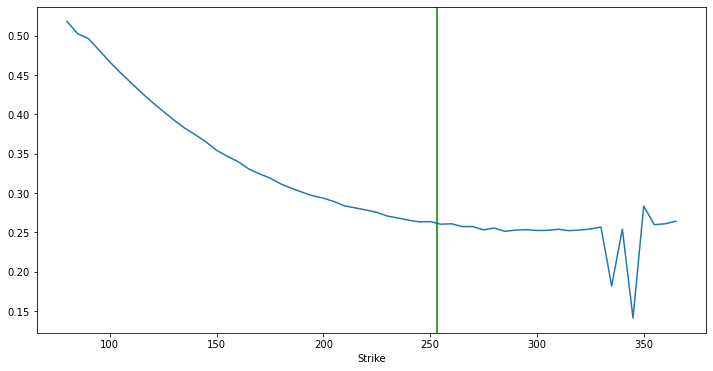

In [170]:
ax = opt_deseada.set_index('Strike').loc[:, 'IV'].plot(figsize=(12,6))
ax.axvline(opt_deseada.Underlying_Price.iloc[0], color='g');

En este caso buscaremos un put in the money (con strike mayor a 250) para junio del siguiente año, como el activo tiene una tendencia alcista debemos definir nuestro strike de tal forma que a la fecha de expiración, el precio spot esté dentro de la zona de ejercicio, considerando que va a estar aumentando de precio este activo elegiremos un strike de \$270.

In [171]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Expiry=='2022-06-17') & (msft_opt.Strike==270)]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1241,270.0,2022-06-17,put,MSFT220617P00270000,36.91,36.4,37.4,0.0,0.0,1.0,4007.0,0.257362,MSFT,False,MSFT,253.2685,2021-05-07 14:50:10,2021-04-28 13:43:17,"{'contractSymbol': 'MSFT220617P00270000', 'str..."


In [172]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            270
Expiry                                            2022-06-17 00:00:00
Type                                                              put
Symbol                                            MSFT220617P00270000
Last                                                            36.91
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                              253.268
Quote_Time                                        2021-05-07 14:50:10
Last_Trade_Date                                   2021-04-28 13:43:17
JSON                {'contractSymbol': 'MSFT220617P00270000', 'str...
Name: 1241, Length: 19, dtype: object

In [173]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT220617P00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 36.91,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 4007,
 'bid': 36.4,
 'ask': 37.4,
 'contractSize': 'REGULAR',
 'expiration': 1655424000,
 'lastTradeDate': 1619617397,
 'impliedVolatility': 0.25736216278076174,
 'inTheMoney': True}

### Opción Europea

#### Simulación de precios con modelo normal de rendimientos

In [174]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = (0.05/100)/360
mu, sigma, r

(0.0013399773029961533, 0.017974828814643663, 1.388888888888889e-06)

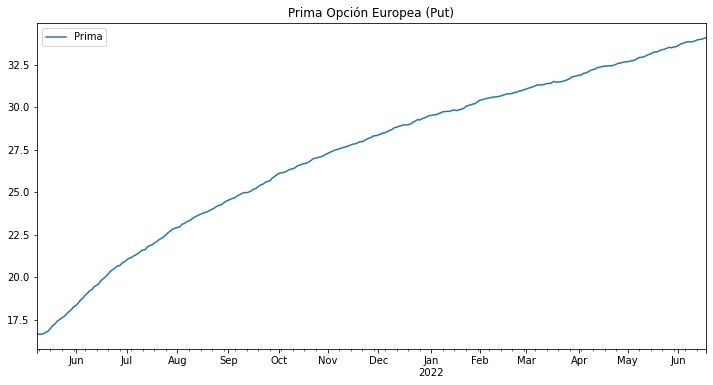

In [175]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

strike = K
put_nr=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
put_nr.plot(figsize=(12,6), title='Prima Opción Europea (Put)');

In [176]:
put_nr.iloc[-1]

Prima    34.082556
Name: 2022-06-17 00:00:00, dtype: float64

In [177]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put_nr.iloc[-1].Prima
i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(32.461400519392434, 35.70371151224219)


In [178]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT220617P00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 36.91,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 4007,
 'bid': 36.4,
 'ask': 37.4,
 'contractSize': 'REGULAR',
 'expiration': 1655424000,
 'lastTradeDate': 1619617397,
 'impliedVolatility': 0.25736216278076174,
 'inTheMoney': True}

Vemos que la prima de la opción que estamos tomando como referencia tiene una prima un poco más alta, pero al ser una diferencia muy pequeña podemos considerar los rangos como válidos.

#### Simulación de precios mediante el histograma de los rendimientos

In [179]:
freq, values = np.histogram(ret_msft-mu+r, bins=10000)
prob = freq/np.sum(freq)

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
put_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)

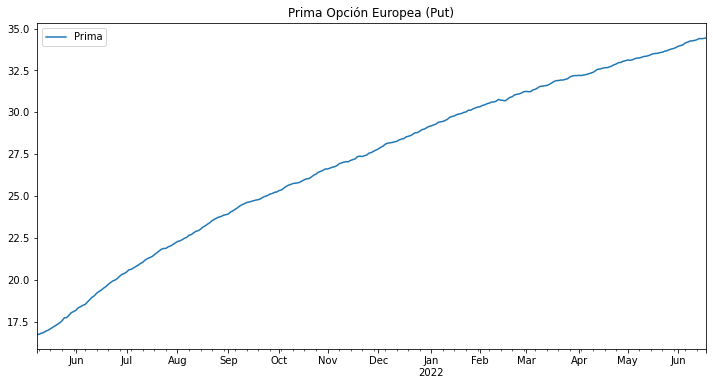

In [180]:
put_hist.plot(figsize=(12,6), title='Prima Opción Europea (Put)');

In [181]:
put_hist.iloc[-1]

Prima    34.4485
Name: 2022-06-17 00:00:00, dtype: float64

In [182]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(32.78972231817812, 36.10727799933734)


In [183]:
opt_valuar['JSON']['lastPrice']

36.91

De igual forma que con el modelo normal, vemos que la prima real se acerca bastante a los intervalos de confianza que tenemos por lo que los consideraremos como válidos

#### Comparando las dos simulaciones de la Opción Europea

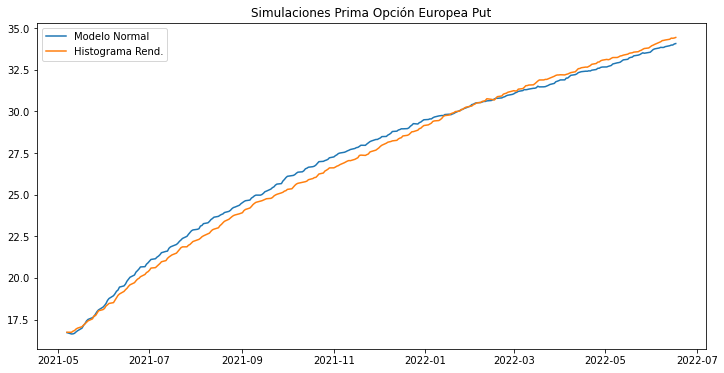

In [184]:
plt.figure(figsize=(12,6))
plt.plot(put_nr.index, put_nr.Prima, label='Modelo Normal')
plt.plot(put_hist.index, put_hist.Prima, label='Histograma Rend.')
plt.title('Simulaciones Prima Opción Europea Put')
plt.legend()
plt.show()

Podemos ver que ambas simulaciones de la opción europea son bastante similares para aproximar los valores de las primas.

### Opción Barrera Up and Out

#### Simulación de precios con modelo normal de rendimientos

En este caso vamos a definir la barrera en \$280 porque considero que este margen de 10 usd entre el strike y la barrera es suficiente para ejercerla, sin tener que pagar una prima elevada como en la opción europea.

In [217]:
B = 280
I = (sim_closes < B).cumprod(axis=0) != 0
put_buo = pd.DataFrame({"Prima": np.exp(-r*ndays)*(I*np.fmax(strike - sim_closes,0)).mean(axis=1)},index=dates) 

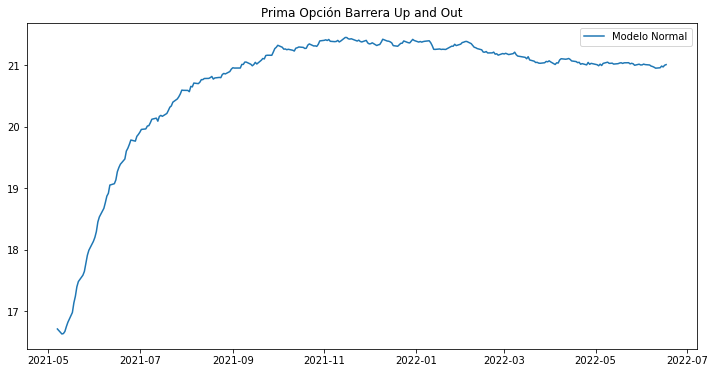

In [218]:
plt.figure(figsize=(12,6))
plt.plot(put_buo, label='Modelo Normal')
plt.title('Prima Opción Barrera Up and Out')
plt.legend()
plt.show()

In [219]:
put_buo.iloc[-1]

Prima    21.008321
Name: 2022-06-17 00:00:00, dtype: float64

In [220]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put_buo.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.387165782796956, 22.629476775646708)


#### Comparando con la prima de la opción europea simulada con modelo normal

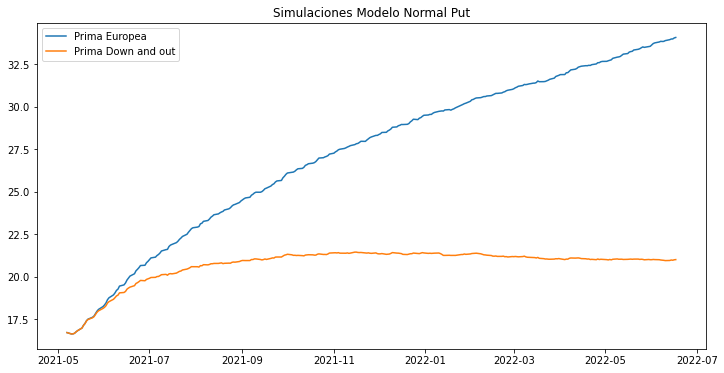

In [221]:
plt.figure(figsize=(12,6))
plt.plot(put_nr.index, put_nr.Prima, label='Prima Europea')
plt.plot(put_buo, label='Prima Down and out')
plt.title('Simulaciones Modelo Normal Put')
plt.legend()
plt.show()

#### Simulación de precios mediante histograma

In [222]:
I = (sim_closes_hist < B).cumprod(axis=0) != 0
put_bhist = pd.DataFrame({"Prima": np.exp(-r*ndays)*(I*np.fmax(strike-sim_closes_hist,0)).mean(axis=1)},index=dates) 

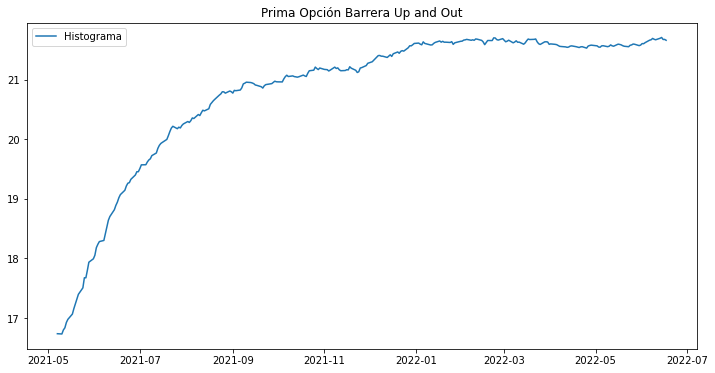

In [223]:
plt.figure(figsize=(12,6))
plt.plot(put_bhist, label='Histograma')
plt.title('Prima Opción Barrera Up and Out')
plt.legend()
plt.show()

In [224]:
put_bhist.iloc[-1]

Prima    21.662735
Name: 2022-06-17 00:00:00, dtype: float64

In [225]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_bhist.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(20.003957162451723, 23.32151284361095)


#### Comparando con la prima de opción europea simulado mediante histogramas

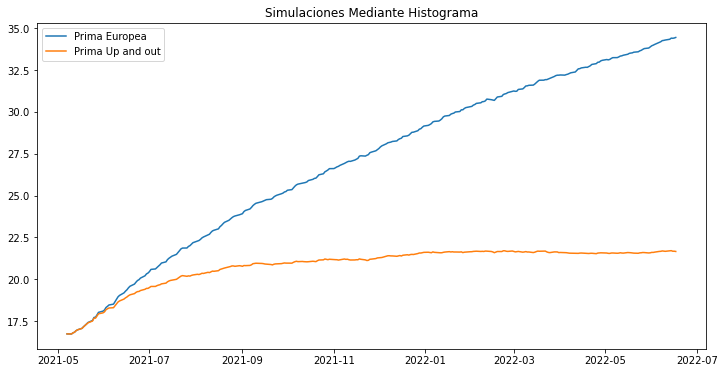

In [226]:
plt.figure(figsize=(12,6))
plt.plot(put_hist.index, put_hist.Prima, label='Prima Europea')
plt.plot(put_bhist, label='Prima Up and out')
plt.title('Simulaciones Mediante Histograma')
plt.legend()
plt.show()

Aquí podemos ver que en las primas de las opciones barrera up and out son bastante bajas en comparación con las europeas porque estamos asumiendo un mayor riesgo al considerar escenarios que nos desactivan la opción, y como tenemos una barrera a \$10 del strike, nos da una ventana un poco cerrada para ejercerla, recordando que entre más arriba esté nuestra barrera, más convergería el precio de la prima de la opción barrera con la europea.

## Eduardo Loza

Enlace al repositorio: <a href="https://github.com/if722749/ProyectoConjunto_LuisGomez_EduardoLoza">https://github.com/if722749/ProyectoConjunto_LuisGomez_EduardoLoza</a>